In [1]:
# IMPORTING LIBRARIES

# Libraries for data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Libraries for optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Libraries for financial data
import quantstats as qs
import ta
import yfinance as yf
import requests

# Libraries for machine learning models
from sklearn.linear_model import LinearRegression

# Libraries for data and time and disabling warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# Sector Performance
Investigating the performance of each sector from Jan 2020 to Aug 2024, we aim to capture the impact of the pandemic on the following sectors: <b>(1) Financials, (2) Technology, (3) Energy, (4) Consumer Discretionary, (5) Consumer Staples, (6) Healthcare, (7) Industrials, (8) Materials, (9) Utilities, (10) Real Estate, and (11) Communication Services</b>.

[*********************100%%**********************]  11 of 11 completed

Ticker
XLB     0.664035
XLC     0.645674
XLE     0.886838
XLF     0.540437
XLI     0.659851
XLK     1.443113
XLP     0.403910
XLRE    0.252945
XLU     0.317929
XLV     0.573459
XLY     0.535836
Name: 2024-07-31 00:00:00, dtype: float64


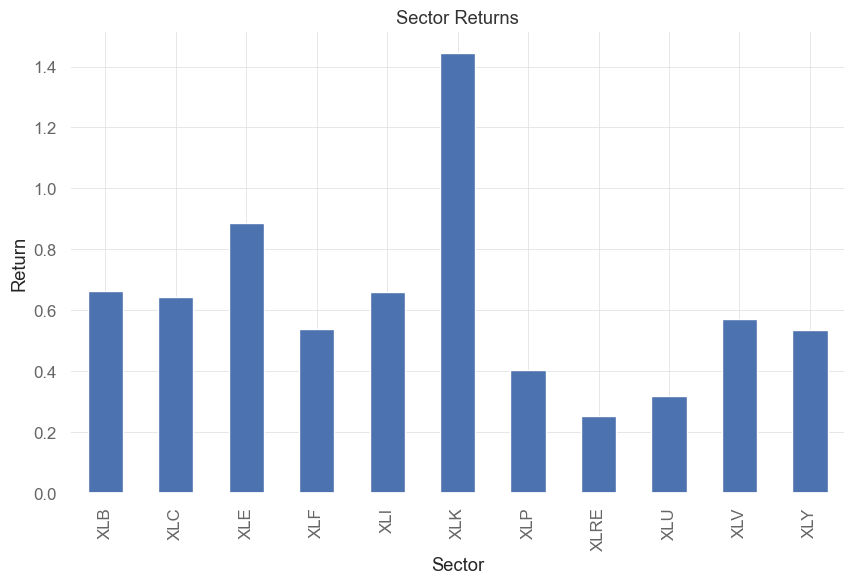

In [2]:
import yfinance as yf

# List of sector ETFs
sector_etfs = {
    'Financials': 'XLF',
    'Technology': 'XLK',
    'Energy': 'XLE',
    'Consumer Discretionary': 'XLY',
    'Consumer Staples': 'XLP',
    'Health Care': 'XLV',
    'Industrials': 'XLI',
    'Materials': 'XLB',
    'Utilities': 'XLU',
    'Real Estate': 'XLRE',
    'Communication Services': 'XLC'
}

# Downloading data for a specific time period
start_date = '2020-01-01'
end_date = '2024-08-01'
sector_data = yf.download(list(sector_etfs.values()), start=start_date, end=end_date)['Adj Close']

# Calculating cumulative returns
sector_returns = sector_data.pct_change().add(1).cumprod() - 1
sector_final_returns = sector_returns.iloc[-1]

print(sector_final_returns)

# Plotting sector returns
sector_final_returns.plot(kind='bar', figsize=(10, 6))
plt.title('Sector Returns')
plt.xlabel('Sector')
plt.ylabel('Return')
plt.show()

Considering the cumulative returns across sectors, we observe that stocks in <b>Technology and Energy have the highest returns</b> with Technology having a greater advantage. Meanwhile, stocks in <b>Real Estate and Utilities</b> performed the lowest. It is also worth noting that sectors driven by consumer spending have shown modest cumulative returns, showing slow economic activity during the time period considered.

In [3]:
sector_tickers = {}
apikey = "3o9TxxBd6hEt7qvL84dleqKGXw6E07U2"

# API endpoint for Financial Modeling Prep
for sector in sector_etfs:
    url = f"https://financialmodelingprep.com/api/v3/stock-screener?sector={sector}&apikey={apikey}"
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        stocks_data = response.json()
        if not stocks_data:
            print(f"No data found for sector: {sector}")
        else:
            print(f"Data found for sector: {sector}")
        ticker_list = [stock['symbol'] for stock in stocks_data]
        sector_tickers[sector] = ticker_list
    else:
        print(f"Error: Unable to fetch data. Status code: {response.status_code}")  

No data found for sector: Financials
Data found for sector: Technology
Data found for sector: Energy
No data found for sector: Consumer Discretionary
No data found for sector: Consumer Staples
No data found for sector: Health Care
Data found for sector: Industrials
Data found for sector: Materials
Data found for sector: Utilities
Data found for sector: Real Estate
Data found for sector: Communication Services


In [29]:
# Create a dictionary of the sector_tickers with available data
data_keys = [key for key, value in sector_tickers.items() if value != []]
filtered_dict = {key: sector_tickers[key] for key in data_keys}

In [30]:
# Create a dictionary of the top performing stocks for each sectors
for key in filtered_dict:
    temp_list = filtered_dict[key]
    data = yf.download(temp_list, start=start_date, end=end_date)['Adj Close']
    cumulative_returns = (data.iloc[-1] / data.iloc[0] - 1) * 100  # Convert to percentage
    temp_df = pd.DataFrame({
        'Cumulative Return (%)': cumulative_returns
    })
    temp_df.index.name = 'Ticker'
    temp_df = temp_df.sort_values(by='Cumulative Return (%)', ascending=False)
    top_stocks = temp_df.head(10)
    filtered_dict[key] = top_stocks.index.tolist()

[*********************100%%**********************]  1000 of 1000 completed

108 Failed downloads:
['ROOD.AS', 'EINC.TO', 'JCS', 'MICT', 'EBIX', 'AYX', 'KLR', 'FORG', 'BSQR', 'WTT', 'CDAY', 'RENN', 'EVOP', 'ESMT', 'COUP', 'POLY', 'DCT', 'ALTVO.PA', 'ALFOC.PA', 'NETE', 'ZFOX', 'MIXT', 'AMOT', 'ALYA', 'SESL.PA', 'CREE', 'WETG', 'ORDI.AS', 'FATH', 'TESS', 'PAYA', 'STM.PA', 'OTMO', 'CD', 'CAJ', 'OIIM', 'MAGT.TO', 'MVP.TO', 'TIE.AS', 'MTBL', 'INS', 'EXR.IR', 'MODN', 'MOSY', 'FLT', 'SPLK', 'BRKS', 'TSRI', 'RAAS', 'CIS.BR', 'ABST', 'RBT', 'PLAN', 'ATVI', 'PCTI', 'QFOR.TO', 'NATI', 'MNTV', 'CVT', 'PBTS', 'NCR', 'SUMO', 'VLDR', 'TGAN', 'MAXR.TO', 'INCO.BR', 'CDAY.TO', 'SSNT', 'NEWR', 'AVID', 'STIX', 'PWFL', 'GBOX', 'INPX', 'DPSI', 'FDGE.TO', 'ABST.TO', 'BKI', 'GSKY', 'MAXR', 'ITE.PA', 'PID.PA', 'EVBG', 'VMW', 'LVOX', 'SRT', 'EMAN', 'SWIR', 'CIH', 'NLOK', 'AGIL', 'EMBK', 'SNPO', 'LLNW', 'GET', 'SCPL', 'CTG', 'IDBA', 'XM', 'SII.PA', 'VIAO', 'IBMA.BR', 'WSTG', 'IIVI']: YFTzMissingError('$%ticker%: 

$ALOBR.PA: possibly delisted; No price data found  (1d 2020-01-01 -> 2024-08-01)


[**********************88%%****************      ]  882 of 1000 completed

$STLRU: possibly delisted; No price data found  (1d 2020-01-01 -> 2024-08-01)


[*********************100%%**********************]  1000 of 1000 completed

111 Failed downloads:
['EFN-PA.TO', 'NES', 'CGRN', 'SIA.BR', 'HYRE', 'YELL', 'ATTO', 'AURS.PA', 'MAJ.AS', 'NXTD', 'SP', 'SNC.TO', 'XBC.TO', 'MAN.PA', 'MLROU.PA', 'PIC.BR', 'RADA', 'PATI', 'INFO', 'CNHI', 'TRTN', 'ZNH', 'ZEV', 'USX', 'VRTV', 'HRT', 'HSC', 'CAI', 'SGOC', 'AIMC', 'PGTI', 'DOOR', 'ABB', 'EGLE', 'CATR.PA', 'NM', 'ORE.LS', 'CHRA', 'CEA', 'VOLT', 'RAVN', 'NEWA', 'SYX', 'WIRE', 'KAMN', 'GOL', 'NLSN', 'PFSW', 'SX.PA', 'BGRY', 'HHR', 'MLCIO.PA', 'IAA', 'TDCX', 'RE.PA', 'PAE', 'SMED', 'AENZ', 'MKUL', 'TSP', 'LGT-B.TO', 'TGH', 'MLUMH.PA', 'MLCAS.PA', 'CUB.TO', 'AJRD', 'ALD.PA', 'BHTG', 'FBHS', 'LAWS', 'RRD', 'OBCI', 'NILE', 'ADES', 'RCII', 'AQUA', 'GFLU', 'BRDS', 'HCCI', 'PFIN', 'ARNC', 'OEG', 'VVNT', 'AAWW', 'ORANW.AS', 'DRTT', 'ALDR.PA', 'USAK', 'CIR', 'SDH', 'MLAAE.PA', 'WBT', 'WLMS', 'OIG', 'KIQ', 'NETI', 'EFL.TO', 'SCX', 'DSKE']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
['PR

$XGC.TO: possibly delisted; No price data found  (1d 2020-01-01 -> 2024-08-01)


[**********************76%%**********            ]  503 of 665 completedFailed to get ticker 'GSV.TO' reason: HTTPSConnectionPool(host='www.yahoo.com', port=443): Read timed out.
[*********************100%%**********************]  665 of 665 completed

110 Failed downloads:
['CRMLW', 'ASTLW', 'FMSTW', 'AMRS']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
['INV.TO', 'AXU', 'MOZ.TO', 'FOE', 'UEX.TO', 'RFP.TO', 'TRQ', 'EXN', 'UFS', 'GPL', 'GGA.TO', 'CINR', 'EOX.TO', 'MLBAT.PA', 'FR.TO', 'TRQ.TO', 'OSN', 'AXU.TO', 'BBL-A.TO', 'TREC', 'TV.TO', 'GSS', 'TMST', 'DSM.AS', 'ENGB.BR', 'AAU', 'CRG.IR', 'TNX.TO', 'MLPFX.PA', 'IKNX', 'NEXA.TO', 'PQG', 'RX.PA', 'KL', 'PCA.PA', 'HRT.TO', 'SMTS', 'TML.TO', 'NCM.TO', 'EUR.PA', 'NZC.TO', 'ZY', 'OMI.TO', 'CMMC.TO', 'VNTR', 'AYM.TO', 'UFS.TO', 'LTHM', 'AQA.TO', 'KMCM', 'KL.TO', 'SYNL', 'CCF', 'GCM.TO', 'SVFD', 'HZM.TO', 'NHK.TO', 'NSR', 'DNT.TO', 'PLM', 'PFB.TO', 'POM.TO', 'GRA', 'GPR.TO', 'UNVR', 'KRA', 'SBB.TO', 

$EAI: possibly delisted; No price data found  (1d 2020-01-01 -> 2024-08-01)


[*********************100%%**********************]  214 of 214 completed

29 Failed downloads:
['LFG', 'RXN', 'BIP-PD.TO', 'MLEES.PA', 'ABIO.PA', 'HNP', 'SEV.PA', 'BEP-PK.TO', 'GWR.TO', 'AQNU', 'ALHEO.PA', 'ALP-PQ', 'RNW.TO', 'CPX-PI.TO', 'ELIQ', 'MIC', 'HEO.TO', 'SJI', 'ETX.TO', 'CU-X.TO', 'ENIA', 'IPLDP', 'EDF.PA', 'SPG.TO', 'ALA-PK.TO', 'JE', 'EON.BR']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
['EAI']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2020-01-01 -> 2024-08-01)')
['FLXE']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
[*********************100%%**********************]  584 of 584 completed

86 Failed downloads:
['AAIC', 'RCO-UN.TO', 'RTL', 'SNR', 'INTO.BR', 'CLNY', 'FPN.PA', 'LEJU', 'MGP', 'FATL.PA', 'TRMT', 'OFC', 'HMG', 'HBRN.IR', 'BPY-UN.TO', 'VER', 'WOLE.BR', 'INDT', 'NRZ', 'WMC', 'WPG', 'MLPAP.PA', 'GGE', 'BRG', 'TCN.TO', 'AIRC', 'DRE', 'ACC', 'PSB', 'SRC', 'CDOR', 'UB

$MLNEO.PA: possibly delisted; No price data found  (1d 2020-01-01 -> 2024-08-01)


[*********************100%%**********************]  426 of 426 completed

91 Failed downloads:
['ALANT.PA', 'ALBUD.PA', 'MOXC', 'ALMAK.PA', 'QUOT', 'MIMO', 'RDBX', 'STRN', 'EGLX', 'SOGO', 'VG', 'LORL', 'ECP.PA', 'AUD', 'BODY', 'TISN.BR', 'TPCO', 'MBT', 'DTEL.BR', 'MDCA', 'ALMNG.PA', 'CIDM', 'LIZI', 'TIGOR', 'AUTO', 'MSGN', 'PTS.TO', 'GNUS', 'OIBR-C', 'SJR', 'MLIOC.PA', 'WWE', 'ATY', 'MTSL', 'TWTR', 'HCHC', 'AESE', 'ALP.PA', 'UZA', 'PCOM', 'ALEMK.BR', 'FAZE', 'ALPLA.PA', 'SFUN', 'TDA', 'GTT', 'ALSK', 'QTT', 'LIVX', 'GSMG', 'ADTH', 'MDP', 'TFA.BR', 'TCH.PA', 'ROI', 'HMTV', 'DISH', 'TRL.TO', 'RADI', 'MLAUD.PA', 'AHC', 'MDF.TO', 'TNET.BR', 'QTEK', 'ALATF.PA', 'LOV', 'TCHCS.PA', 'PTNR', 'ALKER.PA', 'ISIG', 'BBTV.TO', 'FLE.AS', 'HOP.PA', 'BLCT', 'VERIZ.BR', 'EMWP', 'TRKA', 'AMOV', 'SJR-B.TO', 'ILD.PA', 'GCT.TO', 'ALFIL.PA', 'DMS', 'BRILL.AS', 'ADUX.PA', 'CBB', 'AT.TO', 'IDW', 'ALMTA.PA', 'ALADM.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
['MLNEO.PA']: YFPricesMi